In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [90]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.dropna(inplace=True)

In [91]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [92]:
dataset.drop(columns=['id'], inplace=True)

In [93]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [94]:
dataset = dataset[dataset['gender'] != 'Other']
dataset.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [95]:
dataset.work_type.value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [96]:
dataset.ever_married.value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [97]:
dataset.Residence_type.value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [98]:
dataset.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [99]:
dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [100]:
dataset.gender = dataset.gender.map({'Female': 0, 'Male': 1})
dataset.ever_married = dataset.ever_married.map({'No': 0, 'Yes': 1})
dataset.work_type = dataset.work_type.map({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4})
dataset.Residence_type = dataset.Residence_type.map({'Urban': 0, 'Rural': 1})

In [101]:
dataset = dataset.drop(columns=['smoking_status'])
# "Private          2810
# Self-employed     775
# children          671
# Govt_job          630
# Never_worked       22"

In [102]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,1
2,1,80.0,0,1,1,0,1,105.92,32.5,1
3,0,49.0,0,0,1,0,0,171.23,34.4,1
4,0,79.0,1,0,1,1,1,174.12,24.0,1
5,1,81.0,0,0,1,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,2,1,103.08,18.6,0
5106,0,81.0,0,0,1,1,0,125.20,40.0,0
5107,0,35.0,0,0,1,1,1,82.99,30.6,0
5108,1,51.0,0,0,1,0,1,166.29,25.6,0


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

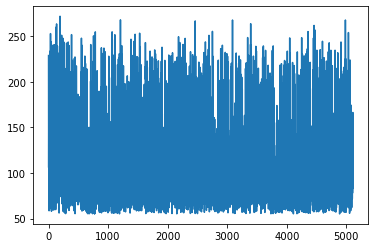

In [105]:
plt.plot(X.avg_glucose_level)

In [119]:
ss_scaler = sklearn.preprocessing.StandardScaler()
FEATURES_TO_SCALE = ['avg_glucose_level', 'bmi', 'age']
X_train[FEATURES_TO_SCALE] = ss_scaler.fit_transform(X_train[FEATURES_TO_SCALE])
X_test[FEATURES_TO_SCALE] = ss_scaler.transform(X_test[FEATURES_TO_SCALE])